In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the Titanic dataset from Seaborn
data = sns.load_dataset('titanic')

# Preprocessing: Handle missing values (no inplace=True)
data['age'] = data['age'].fillna(data['age'].mean())  # Fill missing age with mean
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])  # Fill missing Embarked with mode


In [3]:
# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])  # Convert 'sex' to 0 (male) and 1 (female)
data['embarked'] = le.fit_transform(data['embarked'].fillna('S'))  # Convert Embarked 'C', 'Q', 'S' to numerical


In [4]:
# Select relevant features
X = data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch', 'embarked']]  # Features
y = data['survived']  # Target variable (survived: 1 or 0)


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.82


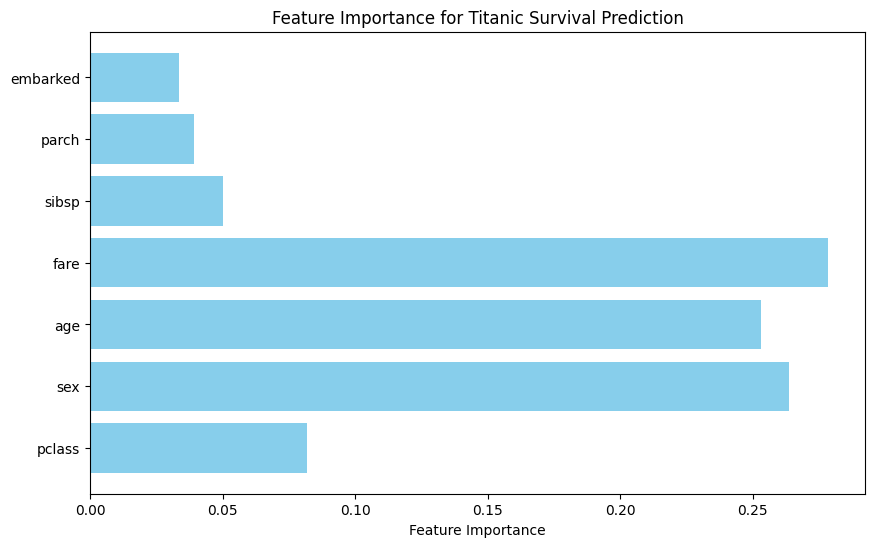

In [7]:
# Feature importance analysis
feature_importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Titanic Survival Prediction')
plt.show()


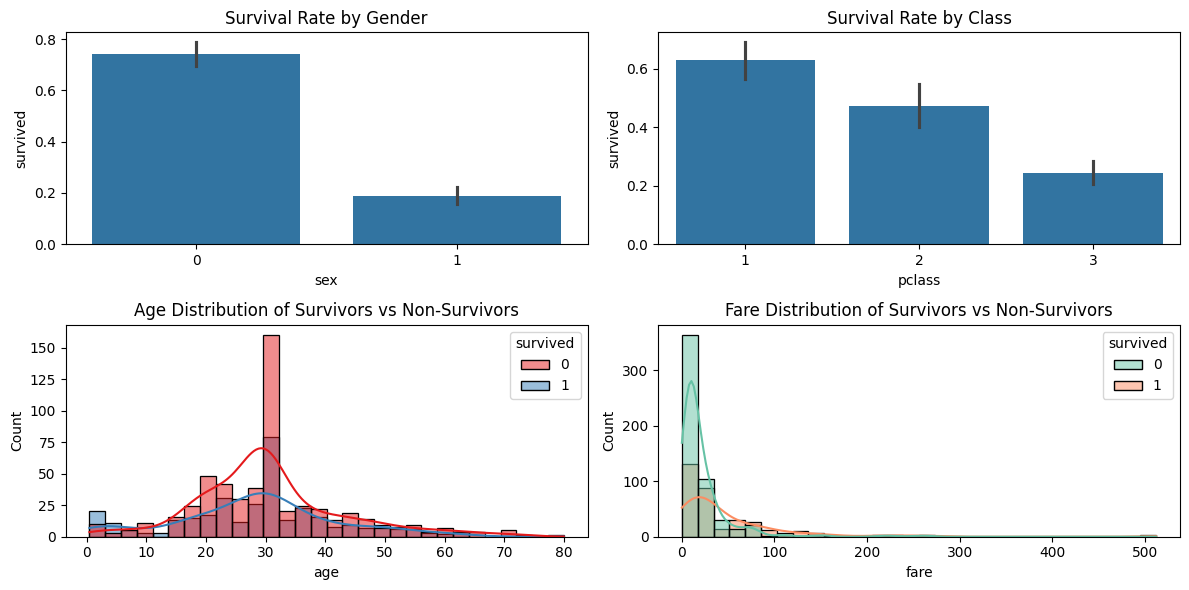

In [8]:
# Visualizations
plt.figure(figsize=(12, 6))

# 1. Survival rate by gender
plt.subplot(2, 2, 1)
sns.barplot(x='sex', y='survived', data=data)
plt.title('Survival Rate by Gender')

# 2. Survival rate by socio-economic status (pclass)
plt.subplot(2, 2, 2)
sns.barplot(x='pclass', y='survived', data=data)
plt.title('Survival Rate by Class')

# 3. Age distribution of survivors vs non-survivors
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='age', hue='survived', kde=True, bins=30, palette='Set1')
plt.title('Age Distribution of Survivors vs Non-Survivors')

# 4. Fare distribution of survivors vs non-survivors
plt.subplot(2, 2, 4)
sns.histplot(data=data, x='fare', hue='survived', kde=True, bins=30, palette='Set2')
plt.title('Fare Distribution of Survivors vs Non-Survivors')

plt.tight_layout()
plt.show()


In [9]:
# Explanation of factors influencing survival:
print("\nExplanation of Factors Influencing Survival:")
print("1. **Gender (sex)**: Women had a much higher survival rate, making gender a key factor.")
print("2. **Socio-economic Status (pclass & fare)**: Higher-class passengers (1st class) were more likely to survive.")
print("3. **Age (age)**: Younger passengers (children) had a higher chance of survival.")
print("4. **Family aboard (sibsp, parch)**: Having family aboard might have influenced survival, but its importance is less than other factors.")
print("5. **Embarked (port)**: The port of embarkation did not have as significant an impact on survival as other factors.")



Explanation of Factors Influencing Survival:
1. **Gender (sex)**: Women had a much higher survival rate, making gender a key factor.
2. **Socio-economic Status (pclass & fare)**: Higher-class passengers (1st class) were more likely to survive.
3. **Age (age)**: Younger passengers (children) had a higher chance of survival.
4. **Family aboard (sibsp, parch)**: Having family aboard might have influenced survival, but its importance is less than other factors.
5. **Embarked (port)**: The port of embarkation did not have as significant an impact on survival as other factors.
